In [29]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from IPython.display import display

Customer_data = pd.read_csv("Bank-Customer-Attrition-Insights-Data.csv")
Customer_data.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)
print(Customer_data.info())
display(Customer_data.head()) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


># Demographic Analysis
>## object: Understand how customer characteristics like geography, gender, and age relate to churn.

##### Germans are more likely to churn 
##### Females are more likely to churn than mans
##### old people are more likely to churn
##### the average age of our customer is 37 year 

In [30]:
sns.set_style("darkgrid")
print(Customer_data["Geography"].value_counts())
print(Customer_data["Gender"].value_counts())
print(Customer_data.groupby(["Geography", "Gender"])["Exited"])


Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Gender
Male      5457
Female    4543
Name: count, dtype: int64


  Geography    Exited
0    France  0.161747
1   Germany  0.324432
2     Spain  0.166734 
    Gender    Exited
0  Female  0.250715
1    Male  0.164743


C:\Users\nmn\AppData\Local\Temp\ipykernel_16616\3260294990.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=geography, x="Geography", y="Exited", palette="coolwarm", edgecolor="black")


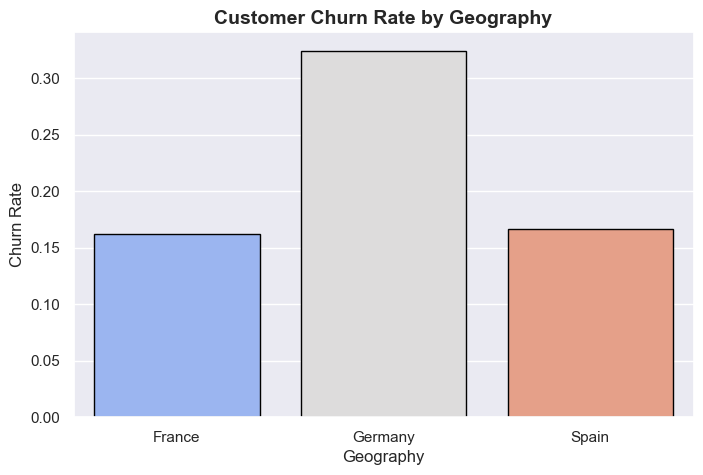

In [31]:
geography = Customer_data.groupby("Geography")["Exited"].mean().reset_index()
gender = Customer_data.groupby("Gender")["Exited"].mean().reset_index()
print(geography,"\n",gender)
plt.figure(figsize=(8, 5))

sns.barplot(data=geography, x="Geography", y="Exited", palette="coolwarm", edgecolor="black")

plt.xlabel("Geography", fontsize=12)
plt.ylabel("Churn Rate", fontsize=12)
plt.title("Customer Churn Rate by Geography", fontsize=14, fontweight="bold")

plt.show()


C:\Users\nmn\AppData\Local\Temp\ipykernel_16616\1884229790.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender, x="Gender", y="Exited", palette="coolwarm", edgecolor="black")


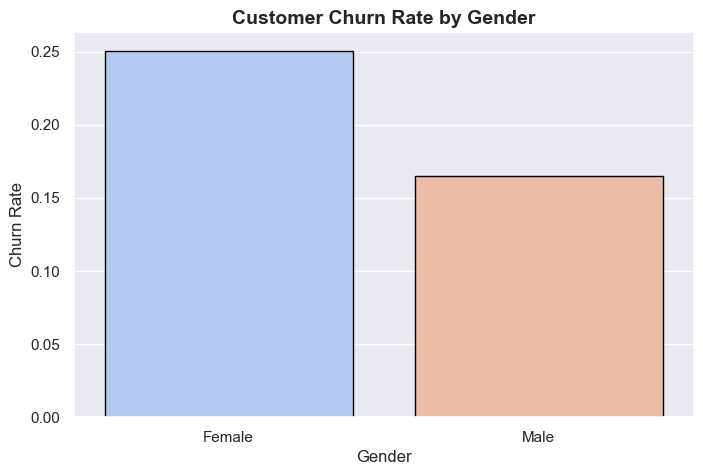

In [32]:
plt.figure(figsize=(8, 5))

sns.barplot(data=gender, x="Gender", y="Exited", palette="coolwarm", edgecolor="black")

plt.xlabel("Gender", fontsize=12)
plt.ylabel("Churn Rate", fontsize=12)
plt.title("Customer Churn Rate by Gender", fontsize=14, fontweight="bold")

plt.show()

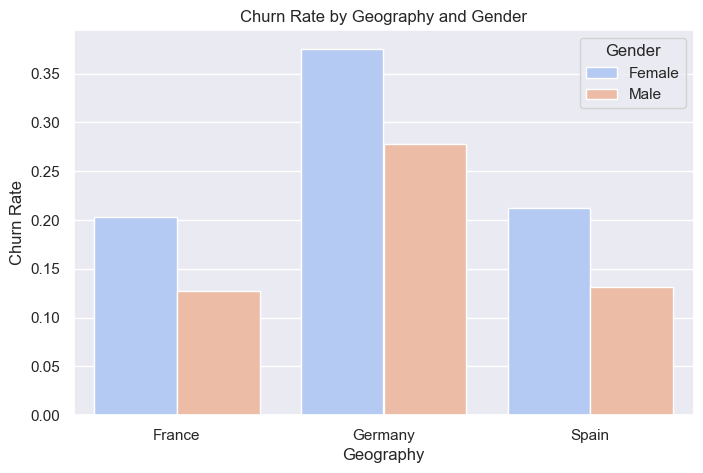

In [33]:
gen_geg = Customer_data.groupby(["Geography", "Gender"])["Exited"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=gen_geg, x="Geography", y="Exited", hue="Gender", palette="coolwarm")
plt.ylabel("Churn Rate")
plt.title("Churn Rate by Geography and Gender")
plt.show()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64


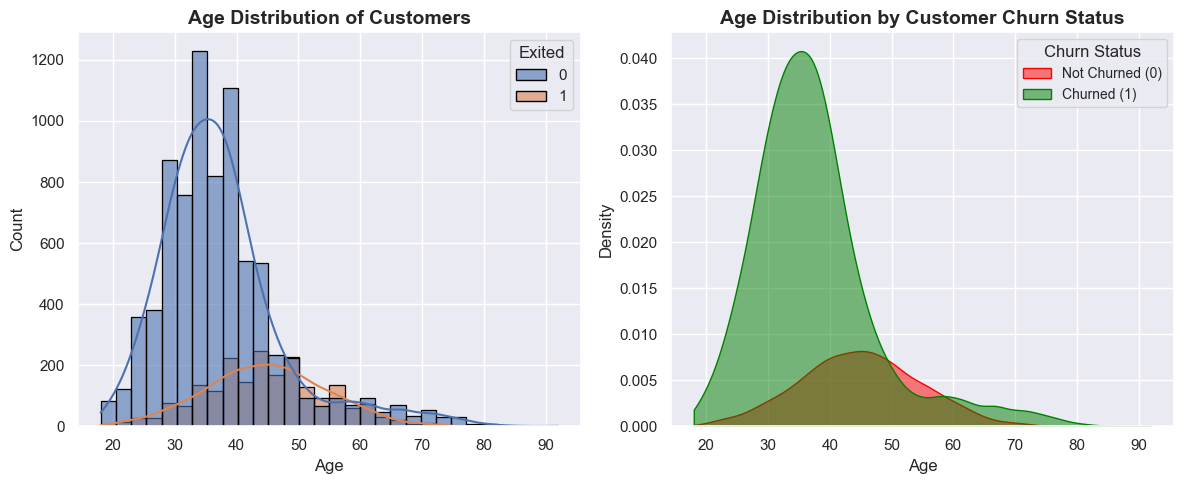

In [34]:
print(Customer_data["Age"].describe())

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data=Customer_data, x="Age",hue="Exited", kde=True, bins=30, color="royalblue", 
             edgecolor="black", alpha=0.6, ax=ax[0])

ax[0].set_xlabel("Age", fontsize=12)
ax[0].set_ylabel("Count", fontsize=12)
ax[0].set_title("Age Distribution of Customers", fontsize=14, fontweight="bold")


sns.kdeplot(data=Customer_data, x="Age", hue="Exited", cut=0, fill=True, 
            palette={0: "green", 1: "red"}, alpha=0.5, ax=ax[1])

ax[1].set_xlabel("Age", fontsize=12)
ax[1].set_ylabel("Density", fontsize=12)
ax[1].set_title("Age Distribution by Customer Churn Status", fontsize=14, fontweight="bold")
legend = ax[1].legend(title="Exited", labels=["Not Churned (0)", "Churned (1)"], fontsize=10)
legend.set_title("Churn Status", prop={"size": 12})

plt.tight_layout()
plt.show()


C:\Users\nmn\AppData\Local\Temp\ipykernel_16616\4147124988.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=Customer_data, x="Exited", y="Age", palette="coolwarm", linewidth=1.5)


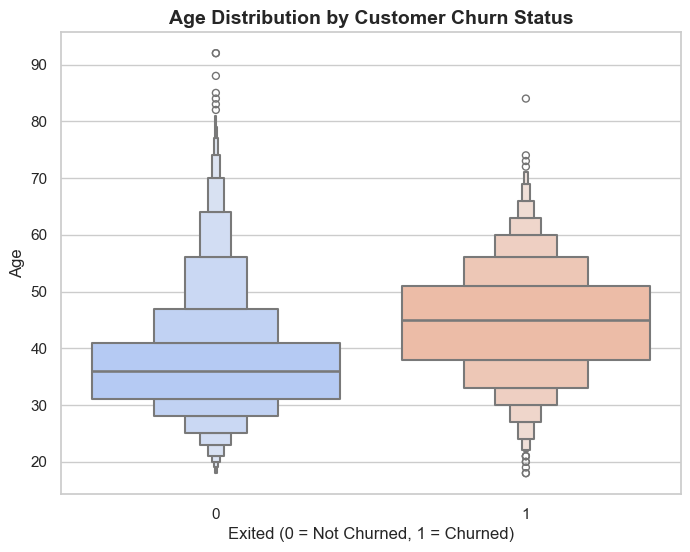

In [35]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 6))

sns.boxenplot(data=Customer_data, x="Exited", y="Age", palette="coolwarm", linewidth=1.5)

plt.xlabel("Exited (0 = Not Churned, 1 = Churned)", fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.title("Age Distribution by Customer Churn Status", fontsize=14, fontweight="bold")

plt.show()


># Account/Relationship Features
>## Objective: Analyze how customers' relationships with the bank influence churn.

In [36]:
def hist(data, title, xlable):
    """
    Plots a histogram with a KDE (Kernel Density Estimate) overlay using Seaborn.

    Parameters:
    data (array-like): The data to be plotted as a histogram.
    title (str): The title of the histogram.
    xlable (str): The label for the x-axis.

    Returns:
    None: Displays the histogram plot.
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(x=data, kde=True, bins=30, color="royalblue", edgecolor="black", alpha=0.6,hue=Customer_data["Exited"])
    plt.xlabel(xlable, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.title(title, fontsize=14, fontweight="bold")
    plt.show()

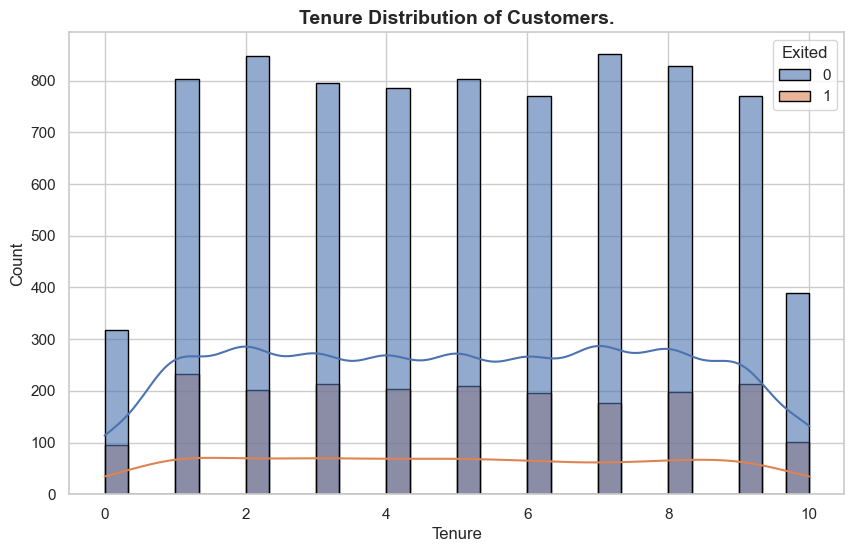

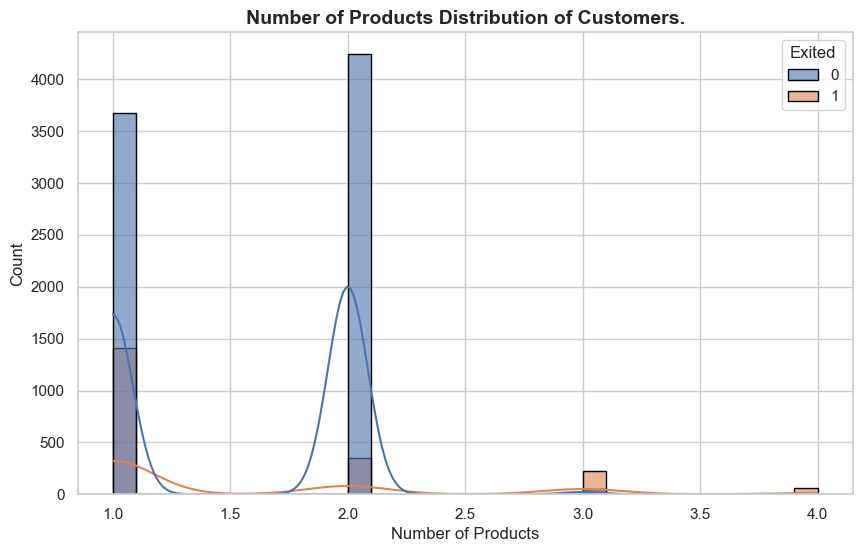

In [37]:
Relationship_df = Customer_data[["Tenure","NumOfProducts","HasCrCard","IsActiveMember","Card Type","Exited"]]
hist(Relationship_df["Tenure"],"Tenure Distribution of Customers.","Tenure")
hist(Relationship_df["NumOfProducts"],"Number of Products Distribution of Customers.","Number of Products")


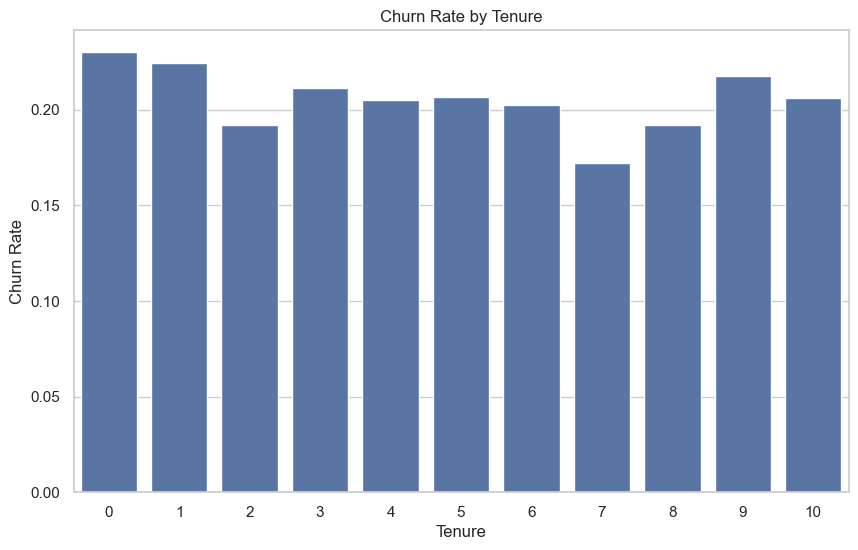

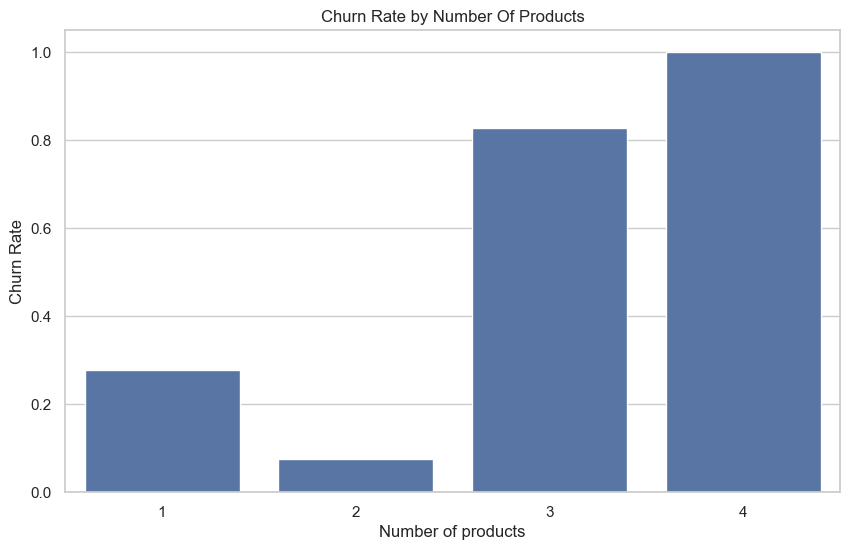

In [38]:
tenure = Relationship_df.groupby("Tenure")["Exited"].mean().reset_index()
NumOfProducts = Relationship_df.groupby("NumOfProducts")["Exited"].mean().reset_index()
#print(tenure,"\n",NumOfProducts)
plt.figure(figsize=(10, 6))
sns.barplot(data=tenure, x="Tenure",y="Exited")
plt.ylabel("Churn Rate")
plt.title("Churn Rate by Tenure")
plt.show()
plt.figure(figsize=(10, 6))
sns.barplot(data=NumOfProducts, x="NumOfProducts",y="Exited")
plt.xlabel("Number of products")
plt.ylabel("Churn Rate")
plt.title("Churn Rate by Number Of Products")
plt.show()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64
IsActiveMember
0    0.268715
1    0.142691
Name: Exited, dtype: float64
HasCrCard
0    0.208149
1    0.201984
Name: Exited, dtype: float64
Card Type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64
Card Type
DIAMOND     0.217790
GOLD        0.192646
PLATINUM    0.203607
SILVER      0.201122
Name: Exited, dtype: float64


C:\Users\nmn\AppData\Local\Temp\ipykernel_16616\3445038615.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Relationship_df.groupby("IsActiveMember")["Exited"].mean().reset_index(),
C:\Users\nmn\AppData\Local\Temp\ipykernel_16616\3445038615.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(["Not Active","Active"])
C:\Users\nmn\AppData\Local\Temp\ipykernel_16616\3445038615.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Relationship_df.groupby("HasCrCard")["Exited"].mean().reset_index(),
C:\Users\nmn\AppData\Local\Temp\ipykernel_16616\3445038615.py:21: UserWarning: 

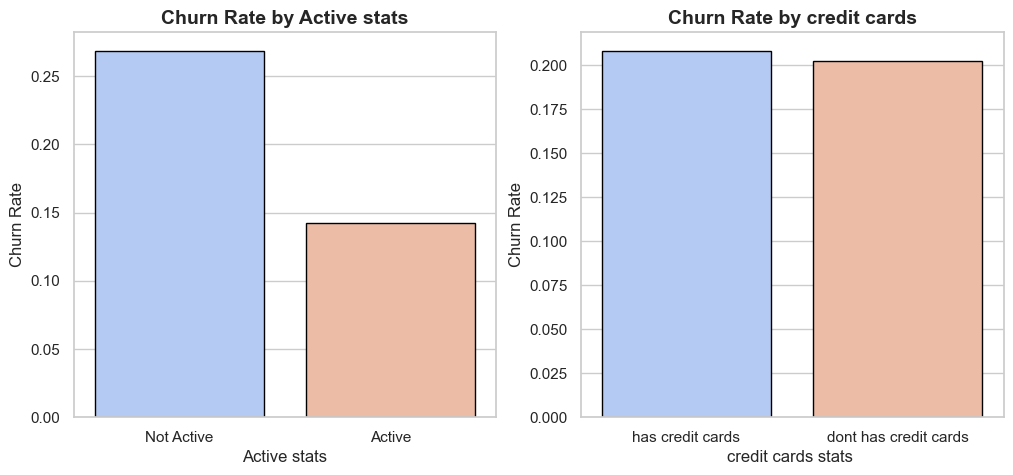

In [39]:
print(Relationship_df["IsActiveMember"].value_counts())
print(Relationship_df.groupby("IsActiveMember")["Exited"].mean())
print(Relationship_df.groupby("HasCrCard")["Exited"].mean())
print(Relationship_df["Card Type"].value_counts())
print(Relationship_df.groupby("Card Type")["Exited"].mean())


fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.barplot(data=Relationship_df.groupby("IsActiveMember")["Exited"].mean().reset_index(),
            x="IsActiveMember",y="Exited",palette="coolwarm", edgecolor="black", ax=ax[0])
ax[0].set_xlabel("Active stats", fontsize=12)
ax[0].set_ylabel("Churn Rate", fontsize=12)
ax[0].set_title("Churn Rate by Active stats", fontsize=14, fontweight='bold')
ax[0].set_xticklabels(["Not Active","Active"])

sns.barplot(data=Relationship_df.groupby("HasCrCard")["Exited"].mean().reset_index(),
            x="HasCrCard",y="Exited",palette="coolwarm", edgecolor="black", ax=ax[1])
ax[1].set_xlabel("credit cards stats ", fontsize=12)
ax[1].set_ylabel("Churn Rate", fontsize=12)
ax[1].set_title("Churn Rate by credit cards", fontsize=14, fontweight='bold')
ax[1].set_xticklabels(["has credit cards","dont has credit cards"])
plt.show()



In [40]:
import scipy.stats as stats
def chi_square_test(df, col1, col2, alpha=0.05):
    """
    Performs a Chi-Square test of independence between two categorical variables.
    
    Parameters:
    df (pd.DataFrame): The dataset.
    col1 (str): The first categorical column (e.g., 'CardType').
    col2 (str): The second categorical column (e.g., 'Exited').
    alpha (float): Significance level (default = 0.05).
    
    Returns:
    None (prints the chi-square statistic, p-value, and conclusion).
    """
    contingency_table = pd.crosstab(df[col1], df[col2])

    chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

    print(f"Chi-Square Statistic: {chi2_stat:.4f}")
    print(f"P-Value: {p_value:.4f}")
    print(f"Degrees of Freedom: {dof}")
    

    if p_value < alpha:
        print("\nReject the null hypothesis: There is a significant association between", col1, "and", col2)
    else:
        print("\nFail to reject the null hypothesis: No significant association between", col1, "and", col2)


In [41]:
chi_square_test(Relationship_df,"Card Type","Exited")
chi_square_test(Relationship_df,"HasCrCard","Exited")

Chi-Square Statistic: 5.0532
P-Value: 0.1679
Degrees of Freedom: 3

Fail to reject the null hypothesis: No significant association between Card Type and Exited
Chi-Square Statistic: 0.4494
P-Value: 0.5026
Degrees of Freedom: 1

Fail to reject the null hypothesis: No significant association between HasCrCard and Exited


# Financial Features


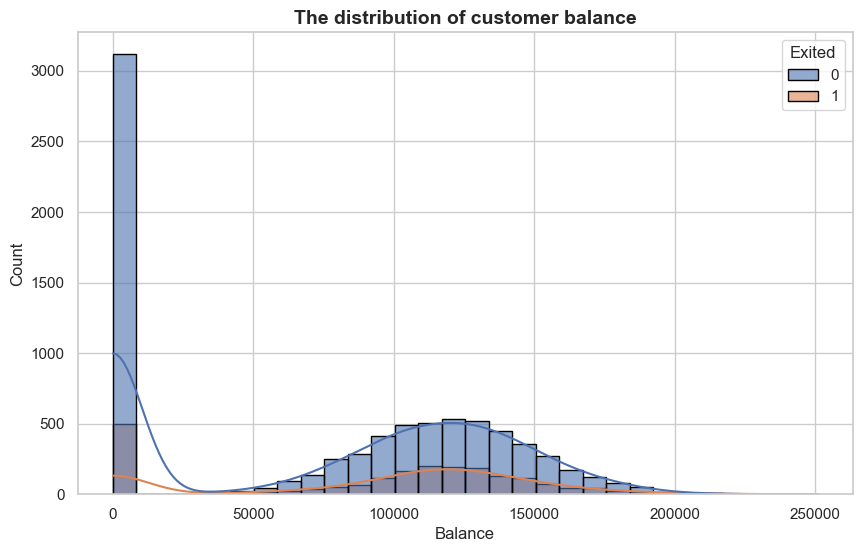

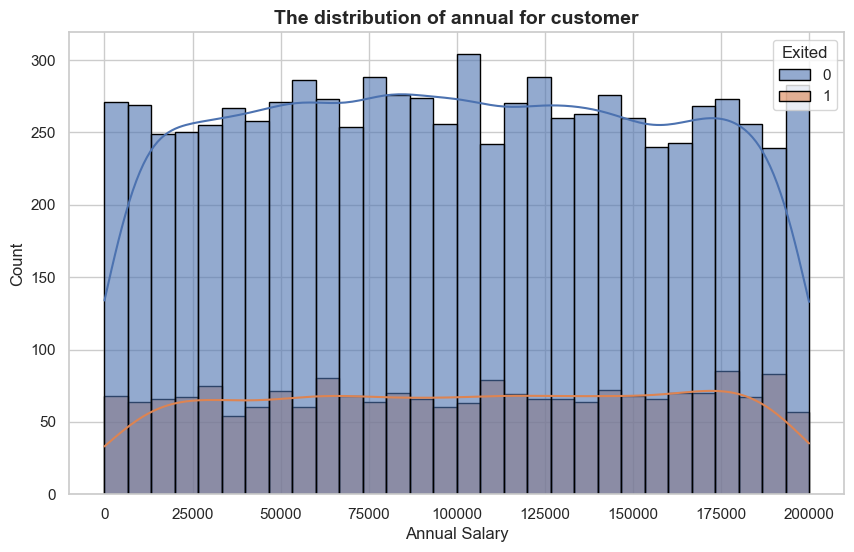

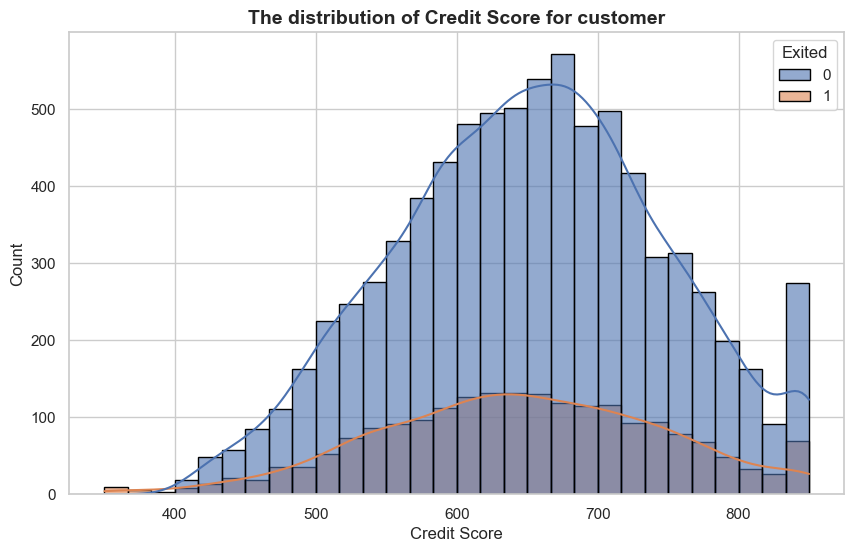

In [42]:
hist(Customer_data["Balance"],"The distribution of customer balance","Balance")
hist(Customer_data["EstimatedSalary"], "The distribution of annual for customer","Annual Salary")
hist(Customer_data["CreditScore"], "The distribution of Credit Score for customer","Credit Score")

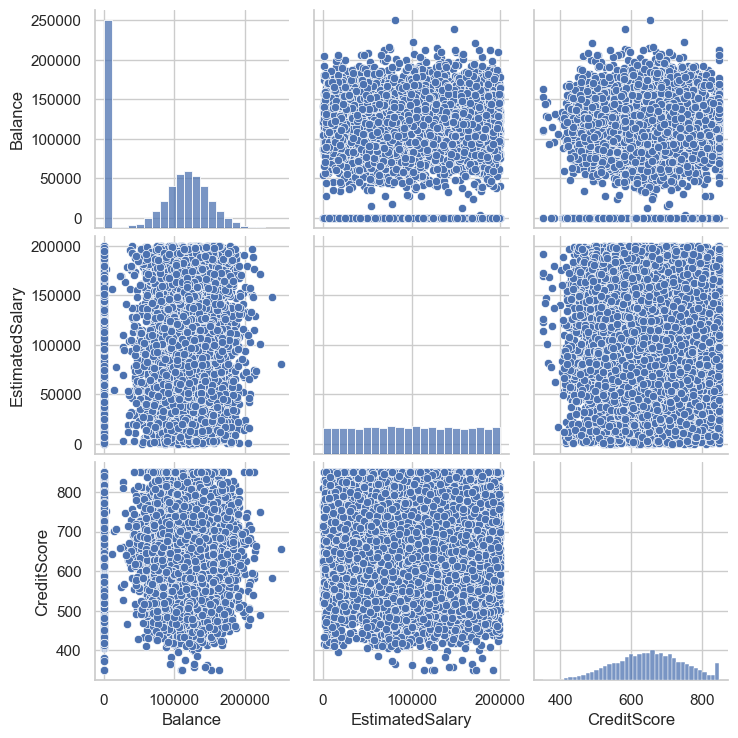

In [43]:
sns.pairplot(Customer_data[["Balance", "EstimatedSalary", "CreditScore"]])

# Behavioral & Engagement Features

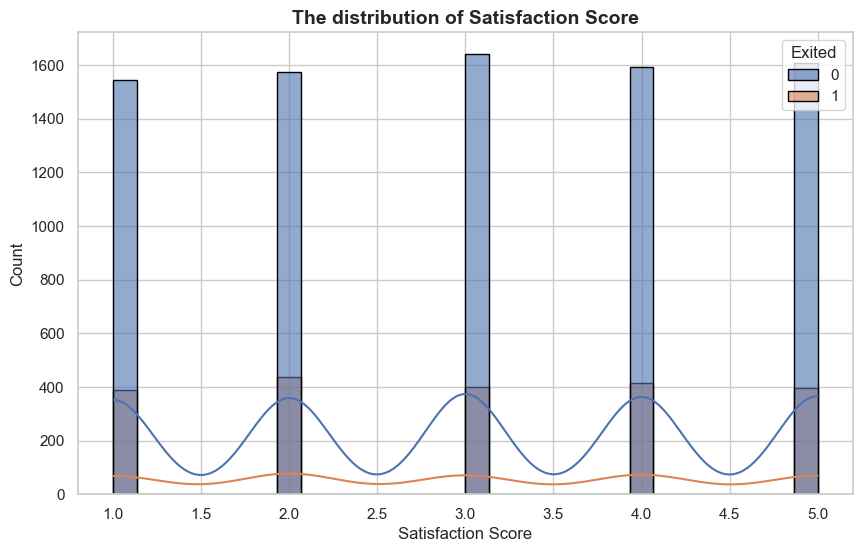

In [44]:
hist(Customer_data["Satisfaction Score"],"The distribution of Satisfaction Score","Satisfaction Score")

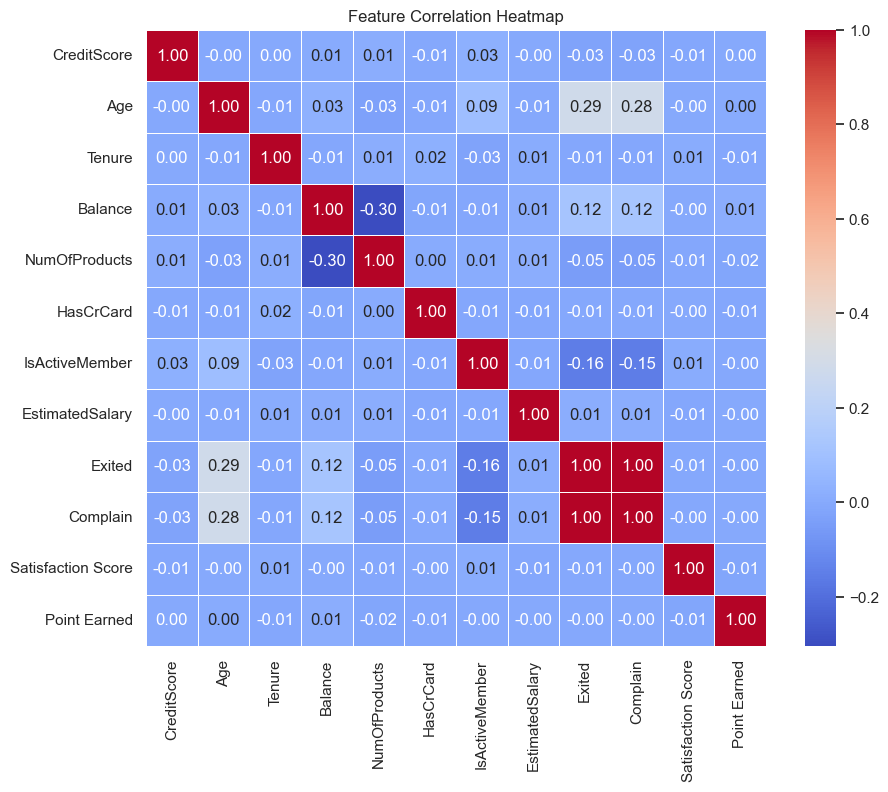

In [47]:
plt.figure(figsize=(10, 8))
corr = Customer_data.drop(["Geography", "Gender", "Card Type"], axis=1).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Data Preprocessing for ML

In [55]:
Customer_data_encoded = pd.get_dummies(Customer_data, columns=["Geography", "Gender"], drop_first=True)
Customer_data_encoded.drop(["Card Type","HasCrCard"],axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

column_for_scaling = ["Age", "Balance", "EstimatedSalary", "CreditScore"]

scaler = StandardScaler()
Customer_data_encoded[column_for_scaling] = scaler.fit_transform(Customer_data_encoded[column_for_scaling])

print(Customer_data_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  float64
 1   Age                 10000 non-null  float64
 2   Tenure              10000 non-null  int64  
 3   Balance             10000 non-null  float64
 4   NumOfProducts       10000 non-null  int64  
 5   IsActiveMember      10000 non-null  int64  
 6   EstimatedSalary     10000 non-null  float64
 7   Exited              10000 non-null  int64  
 8   Complain            10000 non-null  int64  
 9   Satisfaction Score  10000 non-null  int64  
 10  Point Earned        10000 non-null  int64  
 11  Geography_Germany   10000 non-null  bool   
 12  Geography_Spain     10000 non-null  bool   
 13  Gender_Male         10000 non-null  bool   
dtypes: bool(3), float64(4), int64(7)
memory usage: 888.8 KB
None


In [57]:
X = Customer_data_encoded.drop(["Exited"], axis=1)
Y = Customer_data_encoded["Exited"]

x_train,x_test,y_train,y_test = train_test_split(X,Y, stratify=Y,random_state=123,test_size=.20)

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_pred_logreg = log_reg.predict(x_test)
print("Logistic Regression Performance:")
print(accuracy_score(y_test, y_pred_logreg))




Logistic Regression Performance:
0.9985


c:\Users\nmn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

# Predictions
y_pred_rf = rf.predict(x_test)

# Evaluation
print("Random Forest Performance:")
print(accuracy_score(y_test, y_pred_rf))

Random Forest Performance:
0.9985
